<a href="https://colab.research.google.com/github/itsmaribq/itsmaribq/blob/main/lista4fpc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

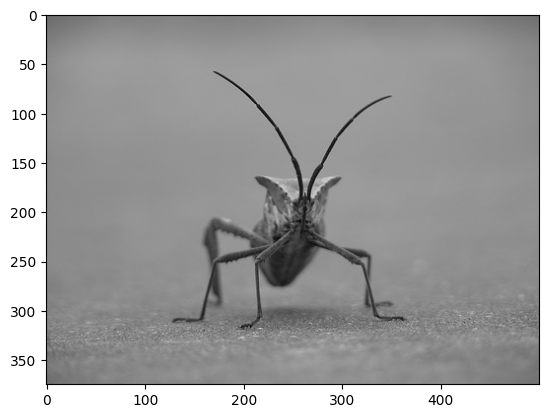

In [ ]:
#EXERCICIO 1 PT1
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('idk.png')
plt.imshow(img)
plt.show()
A = img[:, :, 0]#seleciona todas linhas e colunas do canal

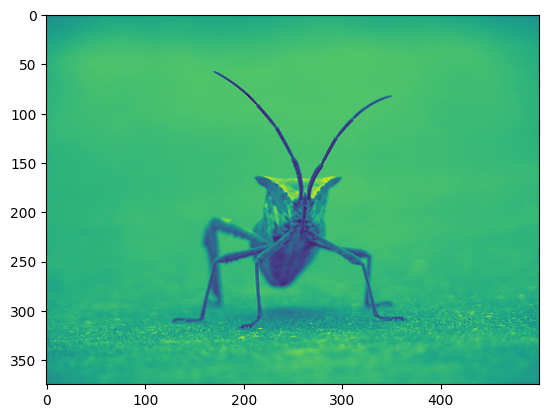

In [ ]:
plt.imshow(A)
plt.show()

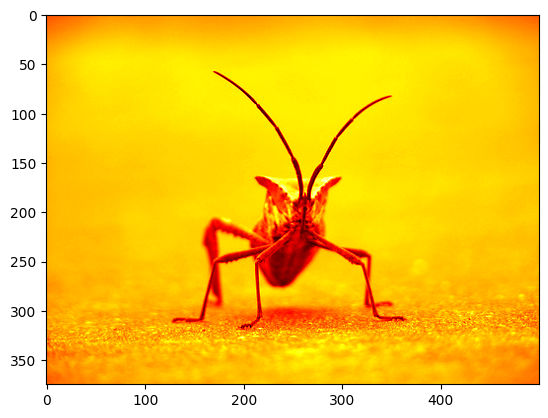

In [ ]:
  plt.imshow(A, cmap="hot")
plt.show()


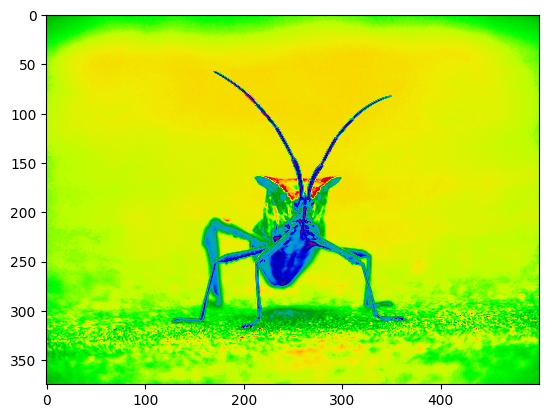

In [ ]:
plt.imshow(A, cmap="nipy_spectral")
plt.show()

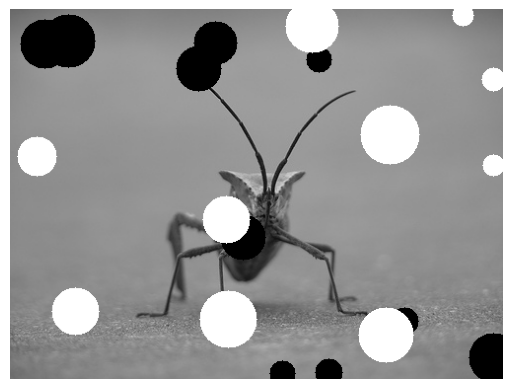

In [ ]:
#EXERCICIO 1 PT2
# Importação das bibliotecas necessárias
import matplotlib.pyplot as plt  # Para exibição de gráficos e imagens
import matplotlib.image as mpimg  # Para carregar imagens
import random  # Para gerar valores aleatórios

# Carregar a imagem
img = mpimg.imread('idk.png')  # Carrega a imagem no formato de matriz numpy
height, width = img.shape[:2]  # Obtém as dimensões (altura e largura) da imagem

# Função para adicionar manchas circulares à imagem
def add_manchas(imagem, num_manchas, tam_raio):#Função para adicionar manchas circulares aleatórias à imagem.

    # Loop para adicionar o número de manchas especificado
    for _ in range(num_manchas):
        # Gera coordenadas aleatórias para o centro da mancha dentro da imagem
        cx, cy = random.randint(0, width - 1), random.randint(0, height - 1)

        # Gera um raio aleatório dentro do intervalo especificado
        radius = random.randint(*tam_raio)

        # Escolhe aleatoriamente a cor da mancha (preto ou branco)
        color = random.choice([0.0, 1.0])  # 0.0 para preto, 1.0 para branco

        # Loop para percorrer os pixels dentro do raio da mancha
        for y in range(max(0, cy - radius), min(height, cy + radius + 1)):#range gera uma sequência de números inteiros
        #calculamos o ponto superior do círculo na direção vertical (linha). O centro da mancha é cy, e subtraímos o raio (radius)
        #  max garante que o limite superior calculado (cy - radius) não ultrapasse os limites da imagem
            for x in range(max(0, cx - radius), min(width, cx + radius + 1)):
                # Verifica se o pixel está dentro do círculo (utilizando a equação de círculo)
                if (x - cx)**2 + (y - cy)**2 <= radius**2:
                    imagem[y, x] = color  # Define a cor do pixel dentro da mancha

# Aplicar manchas à imagem e exibir
add_manchas(img, num_manchas=20, tam_raio=(10, 30))  # Adiciona 20 manchas com raio entre 10 e 30 pixels

# Exibe a imagem com as manchas
plt.imshow(img)  # Exibe a imagem com as manchas adicionadas
plt.axis('off')  # Desliga os eixos, ou seja, não mostra as linhas e números dos eixos
plt.show()  # Mostra a imagem final na tela



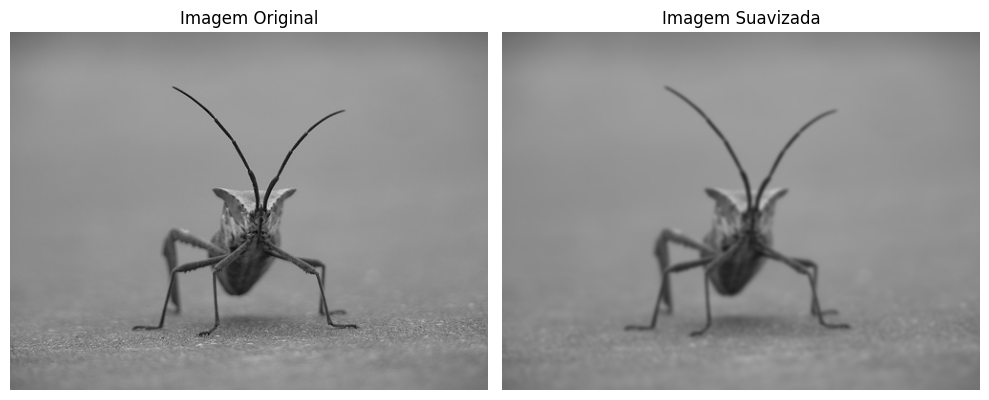

In [ ]:
# Importação das bibliotecas necessárias
import matplotlib.pyplot as plt  # Para exibir imagens e gráficos
import matplotlib.image as mpimg  # Para carregar imagens
import numpy as np  # Para manipulação de matrizes e operações matemáticas

# Função para suavizar a imagem
def suaviza_imagem(img, iteracoes):# Função para suavizar a imagem utilizando um filtro de média.
    #A suavização é feita iterativamente sobre a imagem.

    # Obtém a altura, largura e número de canais da imagem
    altura, largura = img.shape[:2]  #pegando apenas as duas primeiras dimensões altura, largura
    canais = 1 if len(img.shape) == 2 else img.shape[2]  # Verifica se a imagem é em escala de cinza (1 canal) ou RGB (3 canais)
    #img.shape retorna as dimensões da matriz que representa a imagem
    #a imagem tem apenas altura e largura, sem uma dimensão para canais no caso de 1
    #caso contrario  o número de canais é extraído de img.shape[2]

    # Normaliza a imagem para o intervalo [0, 1] se os valores estiverem em [0, 255]
    if img.max() > 1:  # Verifica se os valores da imagem são maiores que 1 (não normalizados)/img.max() retorna o maior valor na matriz da imagem
        img = img / 255.0  # Normaliza/converte os valores para o intervalo [0, 1]

    # Loop para aplicar a suavização um número específico de vezes (iteracoes)
    for _ in range(iteracoes):
        # Cria uma nova matriz para armazenar os valores suavizados
        nova_img = img.copy()  # Faz uma cópia da imagem original para evitar modificar durante o processo

        # Percorre todos os pixels da imagem
        for i in range(altura):  # Loop sobre as linhas da imagem (altura)
            for j in range(largura):  # Loop sobre as colunas da imagem (largura)
                soma = 0  # Inicializa a soma das intensidades dos vizinhos
                contador = 0  # Inicializa o contador de pixels vizinhos válidos

                # Percorre o pixel atual e seus 8 vizinhos (ao redor de cada pixel)
                for di in [-1, 0, 1]:  # Variação na altura do pixel (acima, no meio e abaixo)
                    for dj in [-1, 0, 1]:  # Variação na largura do pixel (esquerda, no meio e direita)
                        ni, nj = i + di, j + dj  # Calcula as novas coordenadas do vizinho
                        if 0 <= ni < altura and 0 <= nj < largura:  # Verifica se o vizinho está dentro dos limites da imagem
                            if canais == 1:  # Caso a imagem seja em tons de cinza (um único canal)
                                soma += img[ni, nj]  # Soma o valor do pixel vizinho
                            else:  # Caso a imagem seja RGB (três canais)
                                soma += img[ni, nj]  # Soma o valor do pixel vizinho (sem distinção entre canais)
                            contador += 1  # Incrementa o contador de vizinhos válidos

                # Calcula a média das intensidades dos vizinhos e atualiza a nova imagem
                nova_img[i, j] = soma / contador  # A média é calculada pela soma dividida pelo número de vizinhos

        # Atualiza a imagem original com a imagem suavizada
        img = nova_img  # A imagem agora é a suavizada, para ser usada na próxima iteração

    # Converte a imagem suavizada de volta para o intervalo [0, 255] e para o tipo de dado uint8
    img = (img * 255).clip(0, 255).astype('uint8')  # Multiplica por 255 e clipa os valores para garantir que fiquem dentro do intervalo [0, 255]

    return img  # Retorna a imagem suavizada

# Carrega a imagem a partir de um arquivo
img = mpimg.imread('idk.png')  # Carrega a imagem "idk.png"

# Converte a imagem para o intervalo [0, 255] se necessário
if img.max() <= 1:  # Verifica se a imagem está normalizada no intervalo [0, 1]
    img = (img * 255).astype('uint8')  # Caso necessário, converte os valores para o intervalo [0, 255] e tipo uint8

# Aplica a suavização na imagem com 3 iterações
img_suavizada = suaviza_imagem(img, iteracoes=3)  # Chama a função de suavização com 3 iterações

# Exibe as imagens original e suavizada
plt.figure(figsize=(10, 5))  # Cria uma figura de tamanho 10x5 para exibir as imagens

# Exibe a imagem original
plt.subplot(1, 2, 1)  # Cria uma sub-figura na posição 1x2, primeira posição
plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)  # Exibe a imagem original, em escala de cinza se for imagem em tons de cinza
plt.title("Imagem Original")  # Título da imagem
plt.axis('off')  # Desliga os eixos para uma exibição mais limpa

# Exibe a imagem suavizada
plt.subplot(1, 2, 2)  # Cria uma sub-figura na posição 1x2, segunda posição
plt.imshow(img_suavizada, cmap='gray' if len(img_suavizada.shape) == 2 else None)  # Exibe a imagem suavizada, em escala de cinza se for imagem em tons de cinza
plt.title("Imagem Suavizada")  # Título da imagem suavizada
plt.axis('off')  # Desliga os eixos para uma exibição mais limpa

# Ajusta o layout para que as imagens fiquem bem distribuídas
plt.tight_layout()  # Ajusta o layout automaticamente para que as imagens não se sobreponham

# Exibe as imagens
plt.show()  # Exibe a figura final com as duas imagens


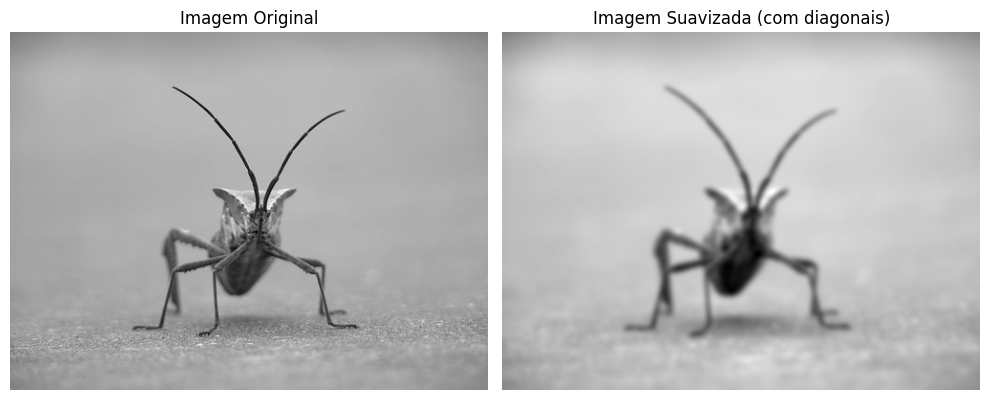

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np  # Importa o NumPy, que será usado para manipulação de matrizes (imagens)
import matplotlib.pyplot as plt  # Importa o Matplotlib para exibição de gráficos e imagens
import matplotlib.image as mpimg  # Importa a funcionalidade do Matplotlib para carregar imagens

# Função para suavizar a imagem
def suaviza_completo(imagem, iteracoes=1):#Aplica suavização na imagem, incluindo horizontais, verticais e diagonais

    img_suavizada = imagem.copy()  # Cria uma cópia da imagem original para não modificar a imagem original

    for _ in range(iteracoes):  # Loop para aplicar a suavização pelo número de iterações especificado
        # Adicionar padding para lidar com bordas
        # A função np.pad adiciona uma camada extra (de tamanho 1) ao redor da imagem original, preenchendo-a com os valores da borda
        # Isso é necessário para que os pixels na borda da imagem também tenham vizinhos para calcular a média
        padded = np.pad(img_suavizada, pad_width=1, mode='edge')  # 'edge' preenche o padding com os valores da borda da imagem

        # Calcular a média dos 8 vizinhos (horizontais, verticais e diagonais)
        img_suavizada = (
            padded[1:-1, 1:-1] +        # Pixel central (não modificado)
            padded[:-2, 1:-1] + padded[2:, 1:-1] +  # Vizinhos verticais (acima e abaixo do pixel central)
            padded[1:-1, :-2] + padded[1:-1, 2:] +  # Vizinhos horizontais (esquerda e direita do pixel central)
            padded[:-2, :-2] + padded[2:, 2:] +     # Diagonal principal (superior esquerda e inferior direita)
            padded[:-2, 2:] + padded[2:, :-2]       # Diagonal secundária (superior direita e inferior esquerda)
        ) / 9  # A média é calculada dividindo a soma pelos 9 pixels (o próprio pixel central + 8 vizinhos)

    return img_suavizada  # Retorna a imagem suavizada

# Carregar a imagem em tons de cinza
Imagem = mpimg.imread('idk.png')  # Carrega a imagem "idk.png"
# Se a imagem for colorida (RGB), converte para tons de cinza
if Imagem.ndim == 3:  # Se a imagem tiver 3 dimensões, é uma imagem colorida (RGB)
    Imagem = np.mean(Imagem, axis=2)  # Converte a imagem RGB para escala de cinza, calculando a média dos 3 canais (vermelho, verde, azul)

# Aplicar suavização com diagonais
imagem_suavizada = suaviza_completo(Imagem, iteracoes=10)  # Chama a função para suavizar a imagem, com 10 iterações

# Visualizar a imagem original e suavizada
plt.figure(figsize=(10, 5))  # Cria uma figura com o tamanho 10x5 para exibir as imagens

# Exibir a imagem original
plt.subplot(1, 2, 1)  # Divide a área de exibição em 1 linha e 2 colunas, e seleciona a primeira posição
plt.imshow(Imagem, cmap='gray')  # Exibe a imagem original em escala de cinza
plt.title("Imagem Original")  # Define o título para a imagem original
plt.axis('off')  # Desliga os eixos para uma exibição mais limpa (sem números e linhas ao redor da imagem)

# Exibir a imagem suavizada
plt.subplot(1, 2, 2)  # Seleciona a segunda posição da área dividida
plt.imshow(imagem_suavizada, cmap='gray')  # Exibe a imagem suavizada em escala de cinza
plt.title("Imagem Suavizada (com diagonais)")  # Define o título para a imagem suavizada
plt.axis('off')  # Desliga os eixos para uma exibição mais limpa

plt.tight_layout()  # Ajusta o layout automaticamente para garantir que as imagens fiquem bem distribuídas
plt.show()  # Exibe a figura final com as duas imagens (original e suavizada)


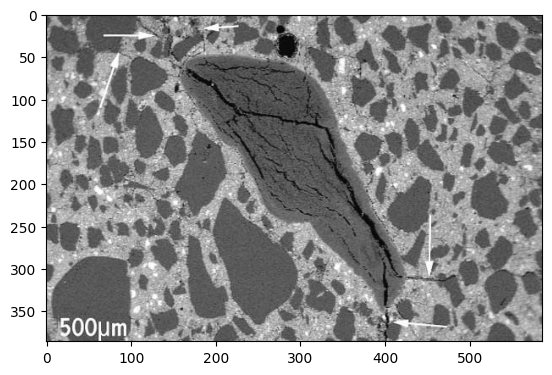

In [ ]:
#EXERCICIO 1 PT4

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('concrete.jpg')
plt.imshow(img)
plt.show()
A = img[:, :, 0]

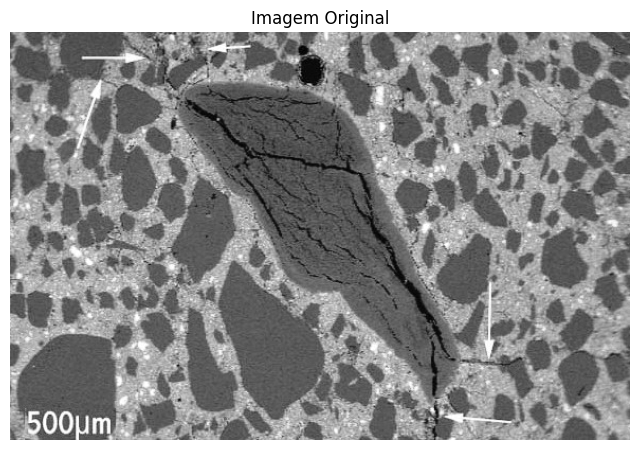

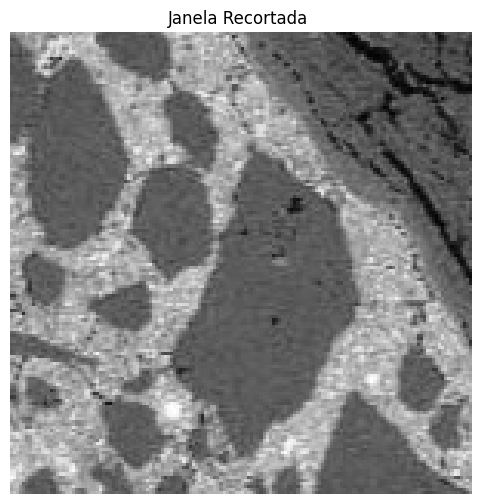

In [ ]:
import matplotlib.pyplot as plt  # Importa a biblioteca para visualização de gráficos e imagens
import matplotlib.image as mpimg  # Importa o módulo para ler imagens
import numpy as np  # Importa a biblioteca para manipulação de arrays (matrizes)

# Carregar a imagem concreta
img = mpimg.imread('concrete.jpg')  # Carrega a imagem
# Verificar se a imagem está em RGB e converter para escala de cinza

if img.ndim == 3:  # Verifica se a imagem tem 3 dimensões, ou seja, é uma imagem RGB
    '
    img = np.mean(img, axis=2)  # Converte a imagem para escala de cinza, fazendo a média dos canais RGB

# Exibir a imagem original

plt.figure(figsize=(8, 6))  # Cria uma figura com o tamanho 8x6 polegadas para exibir a imagem
plt.imshow(img, cmap='gray')  # Exibe a imagem na tela com um mapa de cores em escala de cinza
plt.title("Imagem Original")  # Define o título da imagem como "Imagem Original"
plt.axis('off')  # Desliga os eixos para que apenas a imagem seja exibida
plt.show()  # Exibe a imagem na tela

# Função para recortar uma janela
def recortar_janela(imagem, x_inicio, y_inicio, largura, altura):#Recorta uma janela da imagem a partir das coordenadas iniciais (x_inicio, y_inicio)
    x_fim = x_inicio + largura  # Calcula a coordenada final 'x' da janela (baseada no início e na largura)
    y_fim = y_inicio + altura  # Calcula a coordenada final 'y' da janela (baseada no início e na altura)
    return imagem[y_inicio:y_fim, x_inicio:x_fim]  # Retorna o recorte da imagem (janela) com base nas coordenadas

# Coordenadas iniciais e tamanho da janela
x_inicio = 100  # Define a coordenada inicial 'x' para o recorte
y_inicio = 100  # Define a coordenada inicial 'y' para o recorte
largura = 150  # Define a largura da janela de recorte
altura = 150  # Define a altura da janela de recorte

# Recortar a janela

janela = recortar_janela(img, x_inicio, y_inicio, largura, altura)  # Chama a função de recorte e armazena o resultado em 'janela'

# Exibir a janela recortada
plt.figure(figsize=(6, 6))  # Cria uma nova figura para exibir a janela recortada com o tamanho 6x6 polegadas
plt.imshow(janela, cmap='gray')  # Exibe a janela recortada com o mapa de cores em escala de cinza
plt.title(f"Janela Recortada ")  # Define o título da janela recortada
plt.axis('off')  # Desliga os eixos para que apenas a janela seja exibida
plt.show()  # Exibe a janela recortada na tela


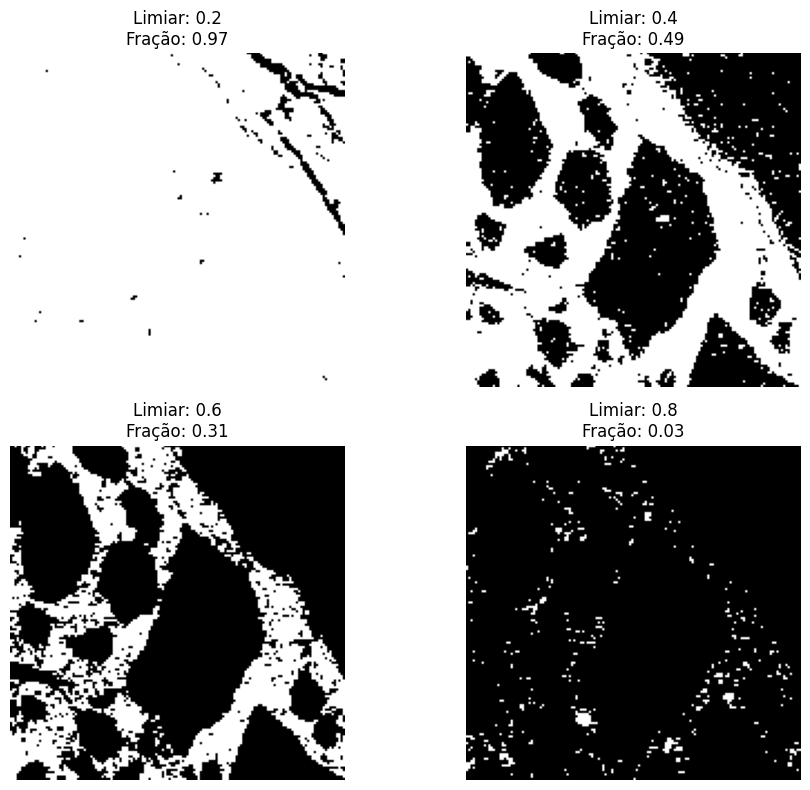

In [ ]:
import numpy as np  # Importa a biblioteca numpy para manipulação de arrays e cálculos matemáticos
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para exibição de gráficos e imagens
import matplotlib.image as mpimg  # Importa o módulo da matplotlib para leitura de imagens

# Função para normalizar a imagem
def normalizar(imagem):#Normaliza os valores da imagem para o intervalo [0, 1]

    return (imagem - np.min(imagem)) / (np.max(imagem) - np.min(imagem))
    # Subtrai o valor mínimo de todos os pixels da imagem (centraliza os valores em torno de zero).
    # Divide pelo intervalo total (máximo - mínimo), escalando os valores para o intervalo [0, 1].

# Função para calcular fração de agregados
def calcular_agregados(recortada, limiar):#Calcula a fração de agregados em uma imagem recortada com base em um limiar dado.

    # Normalizar a imagem
    normalizada = normalizar(recortada)  # Normaliza a imagem recortada para que os valores fiquem entre 0 e 1

    # Classificar pixels acima do limiar como agregados
    img_agregados = (normalizada > limiar) * 1.0  # Classifica os pixels acima do limiar como 1 (agregado) e os abaixo como 0
    # Cria uma matriz (True/False) que é convertida para números reais (float), onde True = 1 e False = 0

    # Calcular a fração de agregados
    fracao_agregados = np.sum(img_agregados) / img_agregados.size  # Calcula a fração de agregados, somando os agregados e dividindo pelo número total de pixels da imagem recortada

    return img_agregados, fracao_agregados  # Retorna a imagem com os agregados e a fração de agregados

# Carregar a imagem recortada (como matriz de tons de cinza)
img = mpimg.imread('concrete.jpg')  # Carrega a imagem 'concrete.jpg' como uma matriz (array)

if img.ndim == 3:  # Verifica se a imagem tem 3 dimensões (indicando que é uma imagem RGB)
    img = np.mean(img, axis=2)  # Se for RGB, converte a imagem para escala de cinza calculando a média dos 3 canais de cor (R, G, B)

# Recortar uma região da imagem (tamanho ajustável)
x_inicio, y_inicio, largura, altura = 100, 100, 150, 150  # Define as coordenadas de início (x, y) e o tamanho da janela de recorte (largura, altura)
recortada = img[y_inicio:y_inicio+altura, x_inicio:x_inicio+largura]  # Faz o recorte da imagem com base nas coordenadas e tamanho fornecidos

# Testar diferentes limiares
limiares = [0.2, 0.4, 0.6, 0.8]  # Define uma lista de limiares que serão testados para classificar os pixels como agregados ou não

plt.figure(figsize=(10, 8))  # Cria uma nova figura para exibição dos resultados com o tamanho especificado (10x8 polegadas)
for i, limiar in enumerate(limiares):  # Itera sobre todos os limiares da lista 'limiares'
    img_agregados, fracao = calcular_agregados(recortada, limiar)  # Chama a função 'calcular_agregados' para obter a imagem binária e a fração de agregados

    # Exibir a imagem processada
    plt.subplot(2, 2, i + 1)  # Cria um subplot de 2x2 para exibir as imagens, posicionando a imagem na posição (i+1)
    plt.imshow(img_agregados, cmap='gray')  # Exibe a imagem binária dos agregados (em escala de cinza)
    plt.title(f"Limiar: {limiar}\nFração: {fracao:.2f}")  # Adiciona um título ao gráfico, mostrando o limiar e a fração de agregados
    plt.axis('off')  # Desliga os eixos para que apenas a imagem seja visível

plt.tight_layout()  # Ajusta o layout para garantir que as imagens não se sobreponham
plt.show()  # Exibe a janela com todas as imagens processadas



In [ ]:
# Carregar a imagem recortada (como matriz de tons de cinza)
img = mpimg.imread('concrete.jpg')
# Changed 'imagem' to 'img' for consistency and to fix the NameError
if img.ndim == 3:  # Converter para escala de cinza, se necessário
    # Changed 'imagem' to 'img' for consistency and to fix the NameError
    img = np.mean(img, axis=2) #Aqui realmente converte pra cinza se necessario

# Recortar uma região da imagem (tamanho ajustável)
x_inicio, y_inicio, largura, altura = 100, 100, 150, 150
# Changed 'imagem' to 'img' for consistency and to fix the NameError
recortada = img[y_inicio:y_inicio+altura, x_inicio:x_inicio+largura] #Intervalo do "zoom" na imagem, ou seja, de 100 a 150 em x e em y tb, ou seja 50x50

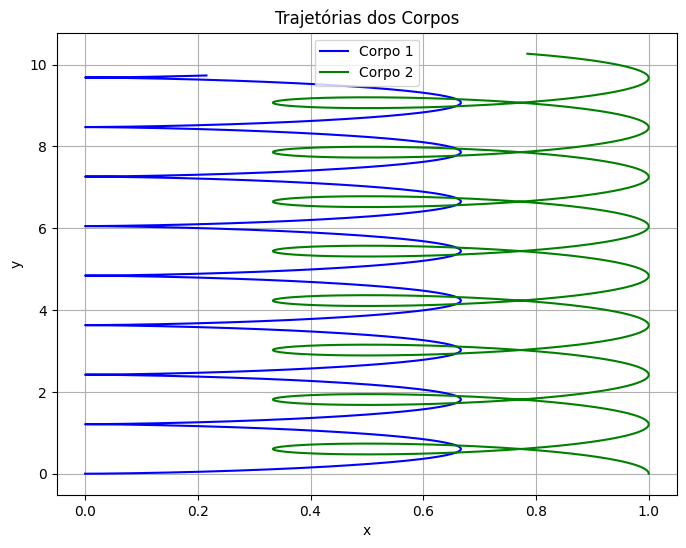

In [ ]:
# UM SISTEMA DINÂMICO

import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a força gravitacional entre dois corpos
# gamma: constante gravitacional
# m1, m2: massas dos corpos
# r1, r2: posições dos corpos
def calc_forca(gamma, m1, m2, r1, r2):
    r12 = r2 - r1  # Vetor que aponta de r1 para r2
    dist = np.linalg.norm(r12)  # Distância entre os corpos
    return gamma * m1 * m2 * r12 / dist**3  # Fórmula da força gravitacional

# Função principal para simular o movimento de dois corpos
# Recebe os parâmetros físicos e retorna as trajetórias dos corpos
def simula_2_corp(gamma, dt, m1, m2, r1_init, v1_init, r2_init, v2_init, n_steps):
    # Inicialização das posições e velocidades iniciais dos corpos como float
    r1, v1 = np.array(r1_init, dtype=float), np.array(v1_init, dtype=float)  # Vetores para o corpo 1
    r2, v2 = np.array(r2_init, dtype=float), np.array(v2_init, dtype=float)  # Vetores para o corpo 2

    # Listas para armazenar as trajetórias (histórico das posições)
    r1_traj, r2_traj = [r1], [r2]

    # Loop principal para simular n_passos passos no tempo
    for _ in range(n_passos):
        # Calcula a força e a aceleração do instante atual (tempo n)
        F12 = calc_forca(gamma, m1, m2, r1, r2)  # Força entre os corpos
        a1, a2 = F12 / m1, -F12 / m2  # Acelerações dos corpos devido à força

        # Atualiza as posições usando o método Verlet-Velocidade
        r1_next = r1 + v1 * dt + 0.5 * a1 * dt**2  # Nova posição do corpo 1
        r2_next = r2 + v2 * dt + 0.5 * a2 * dt**2  # Nova posição do corpo 2

        # Calcula novas forças e acelerações com base nas posições atualizadas
        F12_next = calc_forca(gamma, m1, m2, r1_next, r2_next)  # Nova força
        a1_next, a2_next = F12_next / m1, -F12_next / m2  # Novas acelerações

        # Atualiza as velocidades usando as acelerações média (método Verlet)
        v1 += 0.5 * (a1 + a1_next) * dt  # Nova velocidade do corpo 1
        v2 += 0.5 * (a2 + a2_next) * dt  # Nova velocidade do corpo 2

        # Atualiza as posições para o próximo passo
        r1, r2 = r1_next, r2_next

        # Armazena as posições atuais nas listas de trajetórias
        r1_traj.append(r1)
        r2_traj.append(r2)

    # Retorna as trajetórias completas dos corpos
    return np.array(r1_traj), np.array(r2_traj)

# Função para plotar as trajetórias dos dois corpos no plano 2D
def plot_trajectories(r1_traj, r2_traj):
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    plt.plot(r1_traj[:, 0], r1_traj[:, 1], label="Corpo 1", color="blue")  # Trajetória do corpo 1
    plt.plot(r2_traj[:, 0], r2_traj[:, 1], label="Corpo 2", color="green")  # Trajetória do corpo 2
    plt.xlabel("x")  # Rótulo do eixo x
    plt.ylabel("y")  # Rótulo do eixo y
    plt.title("Trajetórias dos Corpos")  # Título do gráfico
    plt.legend()  # Adiciona legenda ao gráfico
    plt.grid()  # Adiciona grade ao gráfico
    plt.show()  # Exibe o gráfico

# Parâmetros do problema
params = {
    "gamma": 1,  # Constante gravitacional fictícia
    "dt": 0.01,  # Passo de tempo
    "m1": 1,  # Massa do corpo 1
    "m2": 1,  # Massa do corpo 2
    "r1_init": [0, 0],  # Posição inicial do corpo 1
    "v1_init": [0, 0],  # Velocidade inicial do corpo 1
    "r2_init": [1, 0],  # Posição inicial do corpo 2
    "v2_init": [0, 1],  # Velocidade inicial do corpo 2
    "n_steps": 2000  # Número de passos na simulação
}

# Simulação e plotagem
r1_traj, r2_traj = simulate_two_body(**params)  # Executa a simulação com os parâmetros fornecidos
plot_trajectories(r1_traj, r2_traj)  # Plota as trajetórias resultantes


In [ ]:
import numpy as np  # Importa a biblioteca NumPy para operações matemáticas e vetoriais

# Define a função que implementa o método de Verlet para simulação gravitacional
def gravidade_verlet(m1, m2, r1_0, v1_0, r2_0, v2_0, gamma, dt, N_steps, save_to_file=True, filename="evol.txt"):
    """
    m1, m2: Massas dos dois corpos
    r1_0, v1_0: Vetores de posição e velocidade iniciais do corpo 1
    r2_0, v2_0: Vetores de posição e velocidade iniciais do corpo 2
    gamma: Constante gravitacional
    dt: Intervalo de tempo entre os passos da simulação
    N_steps: Número total de passos de simulação
    save_to_file: Se True, salva os resultados em um arquivo
    filename: Nome do arquivo onde os resultados serão salvos
    """

    # Converte as posições e velocidades iniciais em arrays NumPy para facilitar cálculos vetoriais
    r1 = np.array(r1_0, dtype=float)  # Posição inicial do corpo 1
    v1 = np.array(v1_0, dtype=float)  # Velocidade inicial do corpo 1
    r2 = np.array(r2_0, dtype=float)  # Posição inicial do corpo 2
    v2 = np.array(v2_0, dtype=float)  # Velocidade inicial do corpo 2

    # Define uma função interna para calcular a força gravitacional entre os corpos
    def forca_gravitacional(r1, r2):
        """
        Calcula a força gravitacional entre os dois corpos.
        r1, r2: Vetores de posição dos corpos
        Retorna: Vetor da força gravitacional
        """
        r12 = r2 - r1  # Vetor que aponta de r1 para r2
        distancia = np.linalg.norm(r12)  # Calcula a magnitude do vetor (distância entre os corpos)
        if distancia == 0:  # Caso raro: corpos estão na mesma posição
            raise ValueError("As partículas estão na mesma posição!")  # Evita divisão por zero
        # Calcula a força gravitacional usando a fórmula F = G * m1 * m2 * (r12 / |r12|³)
        F = gamma * m1 * m2 * r12 / distancia**3
        return F

    # Prepara para salvar os resultados
    if save_to_file:
        evolfile = open(filename, 'w')  # Abre o arquivo para salvar os dados
    else:
        # Cria um array para armazenar os resultados (tempo, posições e velocidades)
        solution = np.zeros((N_steps, 9))  # 9 colunas: tempo, r1(x,y), v1(x,y), r2(x,y), v2(x,y)

    # Inicia o loop principal para simular os movimentos dos corpos ao longo de N_steps passos
    for n in range(N_steps):
        # Calcula as acelerações iniciais de ambos os corpos devido à gravidade
        a1 = forca_gravitacional(r1, r2) / m1  # Aceleração do corpo 1 (F/m1)
        a2 = -forca_gravitacional(r1, r2) / m2  # Aceleração do corpo 2 (oposta)

        # Atualiza as posições dos corpos usando o método de Verlet
        r1_new = r1 + v1 * dt + 0.5 * a1 * dt**2  # Nova posição do corpo 1
        r2_new = r2 + v2 * dt + 0.5 * a2 * dt**2  # Nova posição do corpo 2

        # Calcula as novas acelerações para as posições atualizadas
        a1_new = forca_gravitacional(r1_new, r2_new) / m1  # Nova aceleração do corpo 1
        a2_new = -forca_gravitacional(r1_new, r2_new) / m2  # Nova aceleração do corpo 2

        # Atualiza as velocidades usando a média das acelerações inicial e nova
        v1_new = v1 + 0.5 * (a1 + a1_new) * dt  # Nova velocidade do corpo 1
        v2_new = v2 + 0.5 * (a2 + a2_new) * dt  # Nova velocidade do corpo 2

        # Calcula o tempo atual da simulação
        t = n * dt

        # Salva os resultados no arquivo ou no array
        if save_to_file:
            evolfile.write(f"{t:.5f} {r1_new[0]:.5f} {r1_new[1]:.5f} {v1_new[0]:.5f} {v1_new[1]:.5f} {r2_new[0]:.5f} {r2_new[1]:.5f} {v2_new[0]:.5f} {v2_new[1]:.5f}\n")
        else:
            # Armazena os valores no array solution (linha correspondente ao passo atual)
            solution[n] = [t, r1_new[0], r1_new[1], v1_new[0], v1_new[1], r2_new[0], r2_new[1], v2_new[0], v2_new[1]]

        # Atualiza as variáveis para o próximo passo da simulação
        r1, v1 = r1_new, v1_new  # Substitui as variáveis do corpo 1
        r2, v2 = r2_new, v2_new  # Substitui as variáveis do corpo 2

    # Fecha o arquivo de resultados ou salva o array em um arquivo de texto
    if save_to_file:
        evolfile.close()  # Fecha o arquivo se estava salvando diretamente
    else:
        np.savetxt(filename, solution, fmt="%.5f")  # Salva o array solution em um arquivo de texto

    # Exibe uma mensagem indicando a conclusão da simulação
    print(f"Simulação concluída! Resultados salvos em {filename}.")

# Parâmetros do problema (inicializações específicas da simulação)
gamma = 1  # Constante gravitacional
dt = 0.01  # Intervalo de tempo entre os passos
m1, m2 = 1, 1  # Massas dos corpos
N_steps = 2000  # Número total de passos de simulação
r1_0 = [0, 0]  # Posição inicial do corpo 1 (origem)
v1_0 = [0, 0]  # Velocidade inicial do corpo 1 (em repouso)
r2_0 = [1, 0]  # Posição inicial do corpo 2 (uma unidade à direita do corpo 1)
v2_0 = [0, 1]  # Velocidade inicial do corpo 2 (em movimento para cima)

# Executa a simulação com os parâmetros definidos
gravidade_verlet(m1, m2, r1_0, v1_0, r2_0, v2_0, gamma, dt, N_steps)


Simulação concluída! Resultados salvos em evol.txt.


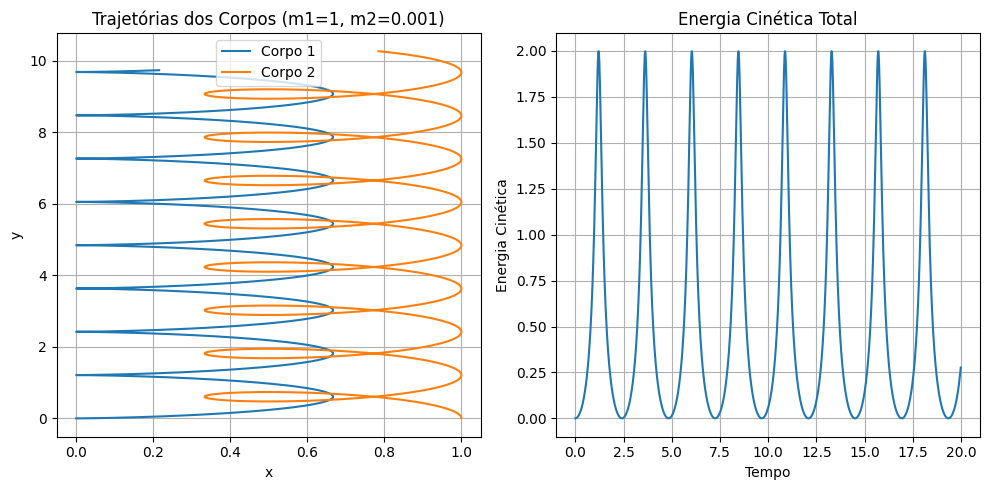

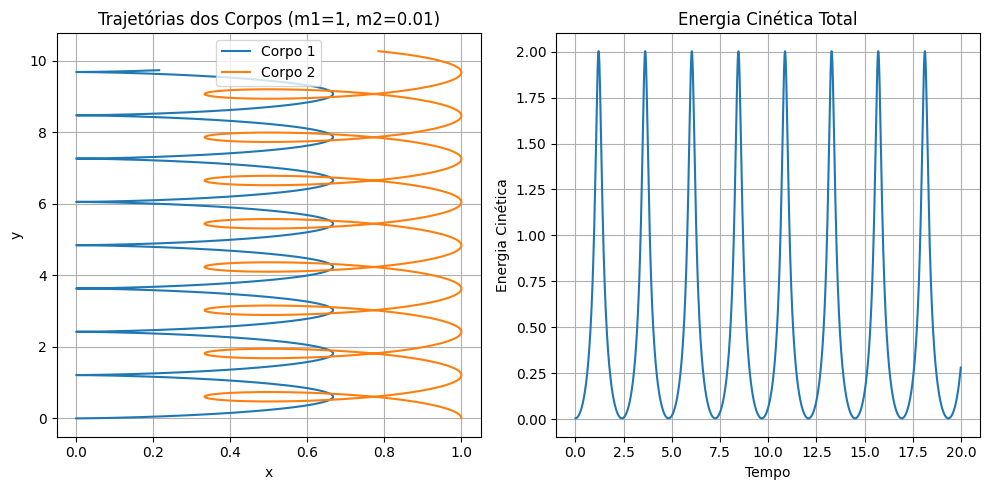

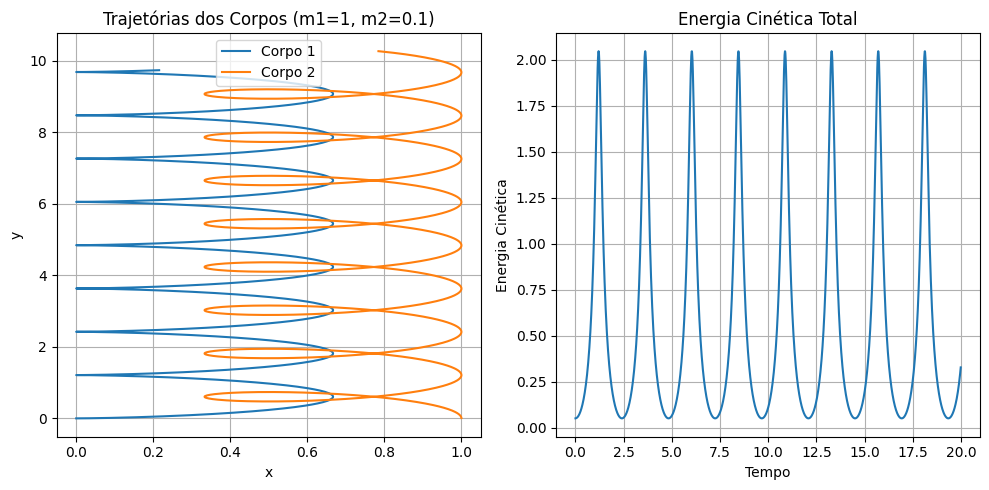

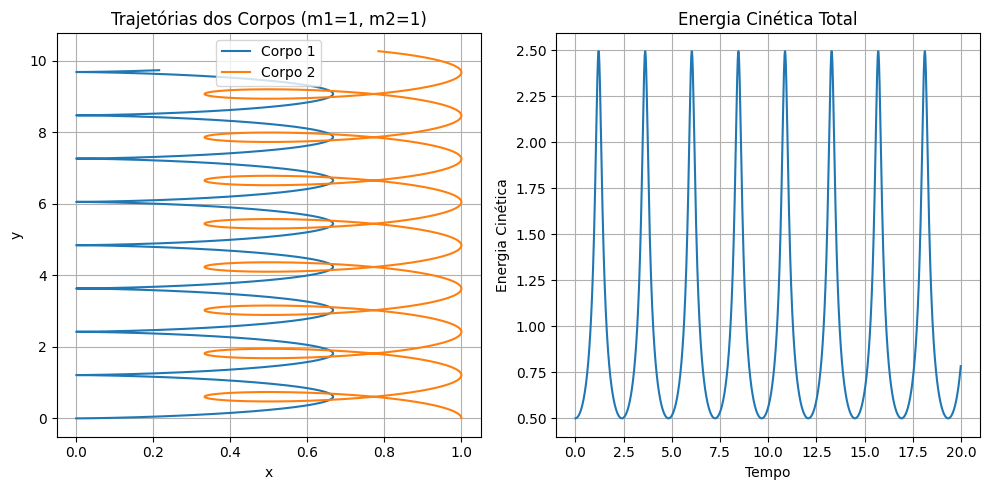

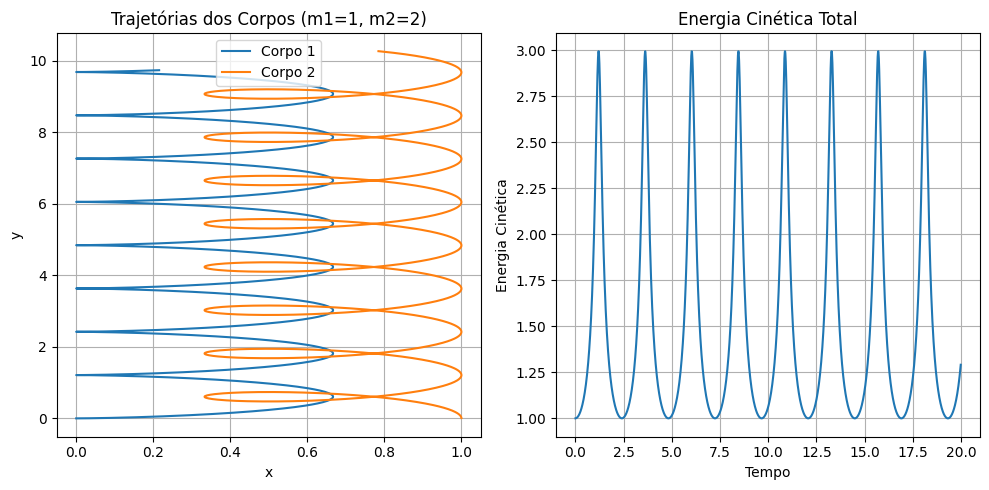

In [ ]:
import numpy as np  # Importa a biblioteca NumPy para operações matemáticas e manipulação de arrays
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para plotar gráficos

# Função para carregar os dados de um arquivo e gerar os gráficos correspondentes
def carregar_e_plotar(arquivo, m1, m2):
    """
    Carrega os dados de um arquivo e plota as trajetórias e a energia cinética dos corpos.

    Parâmetros:
    arquivo: Nome do arquivo que contém os dados da simulação
    m1: Massa do corpo 1
    m2: Massa do corpo 2
    """
    # Carregar os dados do arquivo (assume que o arquivo tem 9 colunas formatadas como na simulação)
    dados = np.loadtxt(arquivo)  # Carrega os dados como um array NumPy

    # Separar os dados em variáveis para facilitar a manipulação
    t = dados[:, 0]  # Coluna 0: Tempo
    r1_x = dados[:, 1]  # Coluna 1: Posição x do corpo 1
    r1_y = dados[:, 2]  # Coluna 2: Posição y do corpo 1
    v1_x = dados[:, 3]  # Coluna 3: Velocidade x do corpo 1
    v1_y = dados[:, 4]  # Coluna 4: Velocidade y do corpo 1
    r2_x = dados[:, 5]  # Coluna 5: Posição x do corpo 2
    r2_y = dados[:, 6]  # Coluna 6: Posição y do corpo 2
    v2_x = dados[:, 7]  # Coluna 7: Velocidade x do corpo 2
    v2_y = dados[:, 8]  # Coluna 8: Velocidade y do corpo 2

    # Calcular a energia cinética total dos dois corpos
    # Energia cinética = 0.5 * massa * velocidade²
    v1_squared = v1_x**2 + v1_y**2  # Quadrado da velocidade do corpo 1 (x² + y²)
    v2_squared = v2_x**2 + v2_y**2  # Quadrado da velocidade do corpo 2 (x² + y²)
    energia_cinetica = 0.5 * m1 * v1_squared + 0.5 * m2 * v2_squared  # Soma das energias cinéticas dos dois corpos

    # Criar uma figura para os gráficos
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura (10x5 unidades)

    # Subplot 1: Gráfico das trajetórias dos corpos
    plt.subplot(1, 2, 1)  # Define o primeiro subplot (1 linha, 2 colunas, posição 1)
    plt.plot(r1_x, r1_y, label="Corpo 1")  # Plota a trajetória do corpo 1
    plt.plot(r2_x, r2_y, label="Corpo 2")  # Plota a trajetória do corpo 2
    plt.xlabel("x")  # Rótulo do eixo x
    plt.ylabel("y")  # Rótulo do eixo y
    plt.title(f"Trajetórias dos Corpos (m1={m1}, m2={m2})")  # Título do gráfico com os valores das massas
    plt.legend()  # Adiciona uma legenda para identificar os corpos
    plt.grid()  # Adiciona uma grade ao gráfico

    # Subplot 2: Gráfico da energia cinética total ao longo do tempo
    plt.subplot(1, 2, 2)  # Define o segundo subplot (1 linha, 2 colunas, posição 2)
    plt.plot(t, energia_cinetica)  # Plota a energia cinética total em função do tempo
    plt.xlabel("Tempo")  # Rótulo do eixo x
    plt.ylabel("Energia Cinética")  # Rótulo do eixo y
    plt.title("Energia Cinética Total")  # Título do gráfico
    plt.grid()  # Adiciona uma grade ao gráfico

    # Ajusta os subplots para evitar sobreposição de elementos
    plt.tight_layout()  # Ajusta o layout automaticamente
    plt.show()  # Exibe os gráficos na tela

# Lista de valores de massa para o corpo 2 (m2), enquanto o corpo 1 (m1) permanece fixo
m1 = 1  # Massa fixa do corpo 1
m2_lista = [0.001, 0.01, 0.1, 1, 2]  # Diferentes valores de massa para o corpo 2

# Nome do arquivo que contém os dados gerados pela simulação
arquivo = "evol.txt"  # Nome do arquivo de entrada gerado anteriormente

# Itera sobre os valores de m2, carregando os dados e gerando os gráficos para cada caso
for m2 in m2_lista:  # Para cada valor na lista de massas do corpo 2
    carregar_e_plotar(arquivo, m1, m2)  # Chama a função para carregar os dados e plotar os gráficos


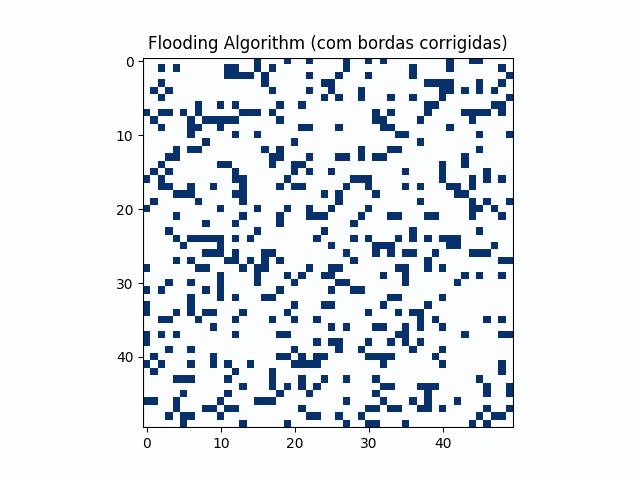

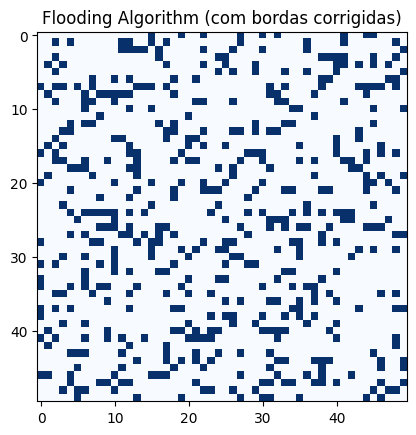

In [ ]:
import numpy as np  # Importa a biblioteca NumPy para manipulação de arrays e cálculos eficientes
import matplotlib.pyplot as plt  # Importa Matplotlib para criação de gráficos
from matplotlib.animation import FuncAnimation, PillowWriter  # Ferramentas para criar animações e salvar como GIF

# Parâmetros
N = 50  # Define o tamanho da grade (N x N)
obstaculos_frac = 0.2  # Fração de células da grade que serão marcadas como obstáculos

# Função para inicializar a grade
def init_grid(N, obstaculos_frac):#Inicializa uma grade N x N com:
    grid = np.zeros((N, N), dtype=int)  # Cria uma grade inicializada com zeros (não alagada)
    grid[N // 2, N // 2] = 1  # Define a célula central como alagada (valor 1)
    #N // 2 calcula o índice do meio da grade, tanto para as linhas quanto para as colunas

    # Calcula o número de obstáculos a serem adicionados
    num_obstaculos = int(obstaculos_frac * N * N)  # Total de células multiplicado pela fração de obstáculos

    # Seleciona aleatoriamente posições para os obstáculos
    obstaculos = np.random.choice(N * N, num_obstaculos, replace=False)#retorna uma amostra aleatória de elementos a partir de um conjunto de opções/N * N é o número total de células na grade
    #num_obstaculos é o número de obstáculos que queremos adicionar na grade
    for index in obstaculos:#percorre cada índice no array obstaculos
    #O index é uma variável que, a cada iteração do loop, recebe um dos valores presentes no array obstaculos
        i, j = divmod(index, N)  # Converte a posição linear para coordenadas (linha, coluna) para poder alterar uma celula específica precisamos das coordenadas 2d (linha e coluna)
        grid[i, j] = 2  # Marca a célula como obstáculo (valor 2)

    return grid  # Retorna a grade inicializada

# Função para atualizar a grade de acordo com o algoritmo de alagamento
def update(grid):#Células alagadas (valor 1) espalham o estado de alagamento para células adjacentes não alagadas (valor 0).
    # Obstáculos (valor 2) bloqueiam o alagamento.

    new_grid = grid.copy()  # Cria uma cópia da grade para evitar alterações no original

    # Itera sobre todas as células da grade
    for i in range(grid.shape[0]):#Este loop percorre todas as colunas da grade/retorna o número de colunas da matriz grid
        for j in range(grid.shape[1]):#acessa o valor da célula na linha i e coluna j/essa linha verifica se a célula atual é alagada
            if grid[i, j] == 1:  # Se a célula está alagada
                # Verifica os vizinhos adjacentes (cima, baixo, esquerda, direita)
                for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:#percorre os vizinhos adjacentes da célula atual, ou seja, as células ao redor da célula (i, j)
                    ni, nj = i + di, j + dj  # Calcula as coordenadas do vizinho/ ni e nj são as novas coordenadas do vizinho
                    if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:  # Verifica se está dentro dos limites
                    #ni deve ser maior ou igual a 0 e ou menor que o número de linhas.
                    #nj deve ser maior ou igual a 0 e oumenor que o número de colunas.
                    #Se o vizinho está fora dos limites, a célula correspondente não será considerada
                        if grid[ni, nj] == 0:  # Se o vizinho é uma célula não alagada
                            new_grid[ni, nj] = 1  # Alaga o vizinho na nova grade

    return new_grid  # Retorna a grade atualizada

# Função de inicialização para a animação
def init():#Inicializa a animação configurando a imagem inicial.
    im.set_data(grid)  # Define a imagem inicial como o estado da grade
    return [im]  # Retorna o objeto da imagem

# Função de atualização para a animação
def animate(frame):#Atualiza o estado da animação a cada quadro.

    global grid  # Declara a grade como variável global para poder modificá-la
    grid = update(grid)  # Atualiza a grade usando a função `update`
    im.set_data(grid)  # Atualiza a imagem com o novo estado da grade
    return [im]  # Retorna o objeto da imagem

# Inicializa a grade com os parâmetros definidos
grid = init_grid(N, obstaculos_frac)

# Configura a figura para a animação
fig, ax = plt.subplots()  # Cria a figura e os eixos para plotagem
im = ax.imshow(grid, cmap="Blues", origin="upper")  # Exibe a grade inicial com um mapa de cores "Blues"
ax.set_title("Flooding Algorithm (com bordas corrigidas)")  # Define o título da figura

# Cria a animação com 100 quadros e intervalo de 200ms entre eles
anim = FuncAnimation(
    fig, animate, init_func=init, frames=100, interval=200, blit=True
)

# Salva a animação como um GIF
gif_writer = PillowWriter(fps=10)  # Define o writer para salvar o GIF com 10 quadros por segundo
anim.save("flooding_algorithm_bordas.gif", writer=gif_writer)  # Salva a animação no arquivo especificado

# Exibe o GIF no ambiente (como Colab, Jupyter Notebook, etc.)
from IPython.display import Image  # Importa a função para exibir imagens
Image(open("flooding_algorithm_bordas.gif", 'rb').read())  # Lê e exibe o GIF gerado


In [ ]:
arr = [5, 3, 8, 6, 2]  # Inicializa o vetor que será ordenado.

def bubble_sort(arr):  # Define a função bubble_sort que recebe uma lista 'arr' como entrada.
    n = len(arr)  # Calcula o comprimento (número de elementos) da lista.

    # Laço externo que percorre todos os elementos do vetor.
    for i in range(n):

        # Laço interno que percorre os elementos não ordenados.
        for j in range(0, n-i-1):

            # Compara o elemento atual (arr[j]) com o próximo (arr[j+1]).
            if arr[j] > arr[j+1]:

                # Troca os elementos arr[j] e arr[j+1] de lugar, se estiverem fora de ordem.
                arr[j], arr[j+1] = arr[j+1], arr[j]

    return arr  # Retorna o vetor ordenado.

# Chama a função bubble_sort para ordenar o vetor 'arr'.
bubble_sort(arr)


[2, 3, 5, 6, 8]

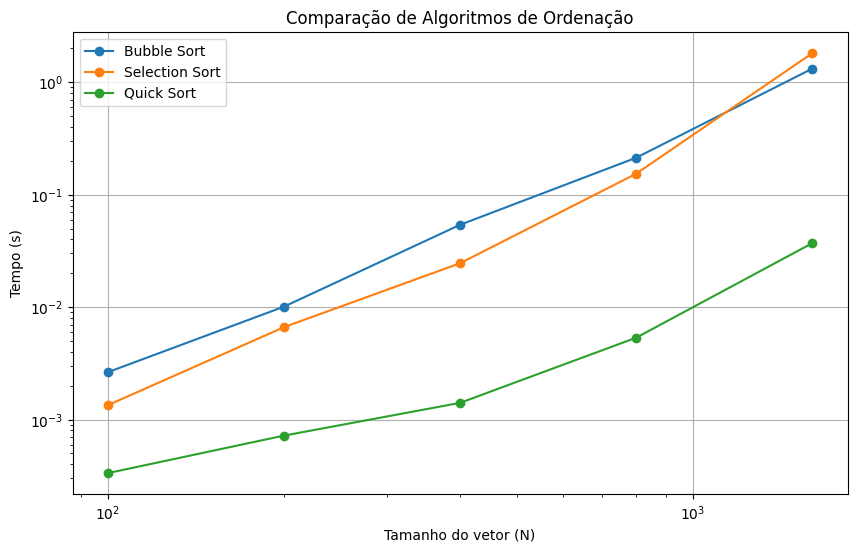

In [ ]:
import numpy as np  # Importa a biblioteca numpy para manipulação de arrays
import time  # Importa a biblioteca time para medir o tempo de execução dos algoritmos
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para criar gráficos

# Algoritmos de ordenação

def bubble_sort(arr):  # Função que implementa o algoritmo de ordenação Bubble Sort
    n = len(arr)  # Obtém o tamanho do vetor arr
    for i in range(n):  # Laço externo que percorre todos os elementos do vetor
        for j in range(0, n - i - 1):  # Laço interno que percorre o vetor até o último elemento não ordenado
            if arr[j] > arr[j + 1]:  # Se o elemento atual for maior que o próximo
                arr[j], arr[j + 1] = arr[j + 1], arr[j]  # Troca os elementos de posição
    return arr  # Retorna o vetor ordenado

def selection_sort(arr):  # Função que implementa o algoritmo de ordenação Selection Sort
    n = len(arr)  # Obtém o tamanho do vetor arr
    for i in range(n):  # Laço externo que percorre todos os elementos do vetor
        min_idx = i  # Inicializa o índice do menor valor como o índice atual
        for j in range(i + 1, n):  # Laço interno que percorre os elementos após o índice i
            if arr[j] < arr[min_idx]:  # Se o elemento arr[j] for menor que arr[min_idx]
                min_idx = j  # Atualiza o índice do menor valor
        arr[i], arr[min_idx] = arr[min_idx], arr[i]  # Troca o elemento mínimo com o elemento atual
    return arr  # Retorna o vetor ordenado

def quick_sort(arr):  # Função que implementa o algoritmo de ordenação Quick Sort
    if len(arr) <= 1:  # Se o vetor tem um ou zero elementos, já está ordenado
        return arr  # Retorna o vetor como está
    pivot = arr[len(arr) // 2]  # Escolhe o pivô como o elemento do meio do vetor
    left = [x for x in arr if x < pivot]  # Cria uma lista com os elementos menores que o pivô
    middle = [x for x in arr if x == pivot]  # Cria uma lista com os elementos iguais ao pivô
    right = [x for x in arr if x > pivot]  # Cria uma lista com os elementos maiores que o pivô
    return quick_sort(left) + middle + quick_sort(right)  # Chama recursivamente o quick_sort para as listas left e right e junta com middle

# Tamanhos dos vetores a serem testados
sizes = [100, 200, 400, 800, 1600]  # Define os tamanhos dos vetores para teste

# Listas para armazenar os tempos de execução de cada algoritmo
bubble_times = []  # Lista para armazenar os tempos de execução do Bubble Sort
selection_times = []  # Lista para armazenar os tempos de execução do Selection Sort
quick_times = []  # Lista para armazenar os tempos de execução do Quick Sort

# Testa cada tamanho de vetor definido em sizes
for size in sizes:  # Itera sobre os diferentes tamanhos de vetores
    array = np.random.randint(0, 1000, size)  # Cria um vetor de números aleatórios entre 0 e 1000 com o tamanho 'size'

    # Bubble Sort
    start = time.time()  # Marca o tempo inicial para o Bubble Sort
    bubble_sort(array.copy())  # Executa o Bubble Sort no vetor (usando .copy() para não modificar o vetor original)
    bubble_times.append(time.time() - start)  # Calcula o tempo de execução e adiciona à lista de tempos

    # Selection Sort
    start = time.time()  # Marca o tempo inicial para o Selection Sort
    selection_sort(array.copy())  # Executa o Selection Sort no vetor
    selection_times.append(time.time() - start)  # Calcula o tempo de execução e adiciona à lista de tempos

    # Quick Sort
    start = time.time()  # Marca o tempo inicial para o Quick Sort
    quick_sort(array.copy())  # Executa o Quick Sort no vetor
    quick_times.append(time.time() - start)  # Calcula o tempo de execução e adiciona à lista de tempos

# Plotagem dos resultados
plt.figure(figsize=(10, 6))  # Cria uma figura com tamanho 10x6 polegadas para o gráfico

# Plota os tempos de execução de cada algoritmo em função do tamanho do vetor
plt.plot(sizes, bubble_times, label="Bubble Sort", marker="o")  # Plota os tempos de Bubble Sort
plt.plot(sizes, selection_times, label="Selection Sort", marker="o")  # Plota os tempos de Selection Sort
plt.plot(sizes, quick_times, label="Quick Sort", marker="o")  # Plota os tempos de Quick Sort

# Ajusta as escalas do gráfico para logaritmo
plt.xscale("log")  # Define a escala do eixo X como logarítmica
plt.yscale("log")  # Define a escala do eixo Y como logarítmica

# Adiciona rótulos aos eixos
plt.xlabel("Tamanho do vetor (N)")  # Rótulo para o eixo X
plt.ylabel("Tempo (s)")  # Rótulo para o eixo Y

# Adiciona título ao gráfico
plt.title("Comparação de Algoritmos de Ordenação")  # Título do gráfico

# Adiciona a legenda para identificar cada linha no gráfico
plt.legend()  # Adiciona a legenda

# Adiciona uma grade ao gráfico para facilitar a leitura
plt.grid(True)  # Habilita a grade no gráfico

# Exibe o gráfico
plt.show()  # Mostra o gráfico na tela
